In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from envs import Soccer
from learners import BasicQ

In [2]:
TIME_LIMIT = 1000000

In [3]:
env = Soccer(debug=False)

In [4]:
learner = BasicQ(env)

In [5]:
q_values = []
lr_values = []
eps_values = []
for t in range(TIME_LIMIT):
    if t % 100 == 0:
        sys.stdout.write('\r'+str(t))
        q = learner.Qs[0][71, 1]
        q_values.append(q)
        
        lr_values.append(learner.get_lr())
        eps_values.append(learner.get_eps())
    learner.train()
    

999900

In [6]:
q_values = np.array(q_values)
errs = np.abs(q_values[1:] - q_values[:-1])

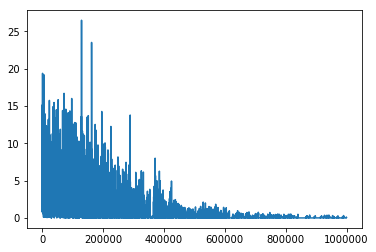

In [7]:
plt.plot(range(100,TIME_LIMIT,100), errs)
#plt.ylim([0,1])
plt.show()

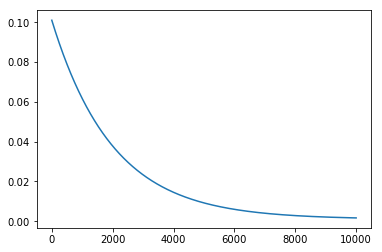

0.0016737946999085466

In [8]:
plt.plot(lr_values)
plt.show()
learner.get_lr()

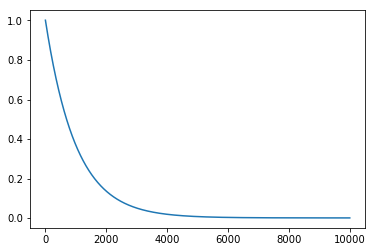

0.001045399929762485

In [9]:
plt.plot(eps_values)
plt.show()
learner.get_eps()

In [10]:
import pandas as pd
df = pd.DataFrame({'t': range(len(errs)),
                   "Err": errs
                  })
df = df[df['Err']>0]
df['t'] = df['t'] * 100
df.head()

,Err,t
0,11.093939,0
1,4.546277,100
2,7.674312,200
3,0.776555,300
4,15.138073,400


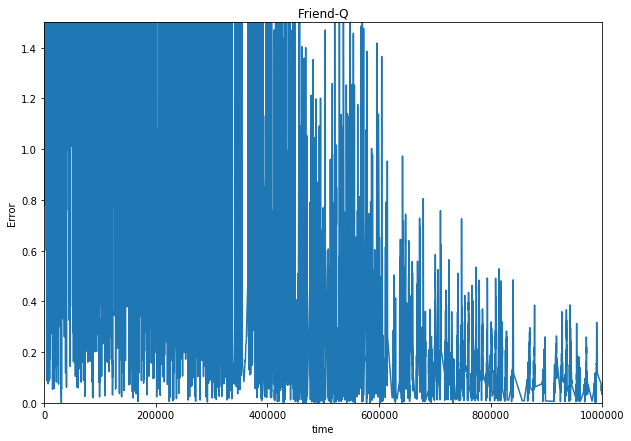

In [11]:
ax = df.plot(x='t', y='Err', figsize=(10, 7), legend=False, ylim=(0., 1.5), title='Friend-Q')
ax.set_xlabel("time")
ax.set_ylabel("Error")
plt.show()